# Spatial DFBA Model

This notebook demonstrates a Spatial Dynamic Flux Balance Analysis (DFBA) model, simulating and visualizing biomass concentrations over time in a two-dimensional (2D) field. The model integrates diffusion, advection, and sinking mechanisms to show how these processes influence biomass distributions at each timestep across the grid bins.

**Key components of the notebook:**
- **Initialization**: Setting up the spatial environment with defined bounds, bins, and initial states for molecules and species.
- **Process Simulation**: Using the `SpatialDFBA` class to simulate species growth based on local conditions and kinetic parameters.
- **Diffusion and Advection**: Applying diffusion and advection processes to update molecule concentrations and biomass distributions.
- **Visualization**: Plotting the objective flux and spatial fields to visualize biomass and molecule concentrations over time.

Run the notebook to observe how different species interact and grow in a spatially heterogeneous environment, influenced by diffusion, advection, and sinking mechanisms.


## Imports

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from vivarium.core.engine import Engine
from processes.spatial_dfba import SpatialDFBA
from plots.field import plot_objective_flux, plot_fields_temporal
from IPython.display import display, HTML
import imageio.v2 as imageio
import io
import base64
import imageio
import logging

In [2]:
# Configuration
total_time = 200
config = {
    'bounds': [10, 10],  # dimensions of the environment
    'nbins': [2, 2],   # division into bins
    'molecules': ['glucose', 'oxygen'],  # available molecules
    'species_info': [
        {
            'name': 'Alteromonas',
            'model': '../data/Alteromonas_Model.xml',  # Path to FBA model file
            'flux_id_map': {
                'glucose': 'EX_cpd00027_e0',
                'oxygen': 'EX_cpd00007_e0'
            },
            'kinetic_params': {
                'glucose': (0.5, 0.0005),  # Km, Vmax for glucose
                'oxygen': (0.3, 0.0005),   # Km, Vmax for oxygen
            }
        },
        {
            'name': 'ecoli',
            'model': '../data/iECW_1372.xml',  # Path to E. coli model file
            'flux_id_map': {
                'glucose': 'EX_glc__D_e',
                'oxygen': 'EX_o2_e'
            },
            'kinetic_params': {
                'glucose': (0.4, 0.06),  # Km, Vmax for glucose
                'oxygen': (0.25, 0.06),  # Km, Vmax for oxygen
            }
        }
    ]
}

# Initialize the process
spatial_dfba = SpatialDFBA(config)

# Initial state configuration
initial_state_config = {
    'uniform': {
        'glucose': 200.0,
        'oxygen': 200.0,
        'species': {
            'ecoli': 0.5,
            'Alteromonas': 0.5
        }
    }
}

# Create the initial state
initial_state = spatial_dfba.initial_state(initial_state_config)

# Create the simulation engine
sim = Engine(
    initial_state=initial_state,
    processes={'spatial_dfba': spatial_dfba},
    topology={'spatial_dfba': {
        'fields': ('fields',),
        'species': ('species',),
        'dimensions': ('dimensions',),
    }}
)

# Run the simulation
sim.update(total_time)

# Get the results
data = sim.emitter.get_timeseries()


ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Loaded model for Alteromonas
Loaded model for ecoli

Simulation ID: 24aa472c-2296-11ef-957a-ba21c95c07d8
Created: 06/04/2024 at 13:16:12


/Users/amin/Desktop/VivaComet/myenv/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Completed in 88.54 seconds


In [2]:
# Set up logging
logging.basicConfig(level=logging.INFO)

# Configuration
total_time = 200
config = {
    'bounds': [10, 10],  # dimensions of the environment
    'nbins': [2, 2],  # division into bins
    'molecules': ['glucose', 'oxygen'],  # available molecules
    'species_info': [
        {
            'name': 'Alteromonas',
            'model': '../data/Alteromonas_Model.xml',
            'flux_id_map': {
                'glucose': 'EX_cpd00027_e0',
                'oxygen': 'EX_cpd00007_e0'
            },
            'kinetic_params': {
                'glucose': (0.5, 0.0005),
                'oxygen': (0.3, 0.0005),
            }
        },
        {
            'name': 'ecoli',
            'model': '../data/iECW_1372.xml',
            'flux_id_map': {
                'glucose': 'EX_glc__D_e',
                'oxygen': 'EX_o2_e'
            },
            'kinetic_params': {
                'glucose': (0.4, 0.06),
                'oxygen': (0.25, 0.06),
            }
        }
    ]
}

# Initialize the process
spatial_dfba = SpatialDFBA(config)

# Function to print the initial state
def print_initial_state(state):
    logging.info("Initial state:")
    for key, value in state.items():
        logging.info(f"{key}: {value}")

# Set initial state configuration to random
initial_state_config = {
    'random': {
        'glucose': 200.0,
        'oxygen': 200.0,
        'species': {
            'ecoli': 0.5,
            'Alteromonas': 0.5
        }
    }
}

# Create the initial state
initial_state = spatial_dfba.initial_state(initial_state_config)
print_initial_state(initial_state)

# Create the simulation engine
sim = Engine(
    initial_state=initial_state,
    processes={'spatial_dfba': spatial_dfba},
    topology={'spatial_dfba': {
        'fields': ('fields',),
        'species': ('species',),
        'dimensions': ('dimensions',),
    }}
)

# Run the simulation
sim.update(total_time)

# Get the results
data = sim.emitter.get_timeseries()
fields = data["fields"]
fields.update(data["species"])

# Print final states for verification
logging.info(f"Final species states: {data['species']}")
logging.info(f"Final field states: {data['fields']}")



ERROR:cobra.io.sbml:'' is not a valid SBML 'SId'.


Loaded model for Alteromonas
Loaded model for ecoli

Simulation ID: 64a9a07a-2296-11ef-97a6-ba21c95c07d8
Created: 06/04/2024 at 13:18:00


/Users/amin/Desktop/VivaComet/myenv/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Completed in 91.60 seconds


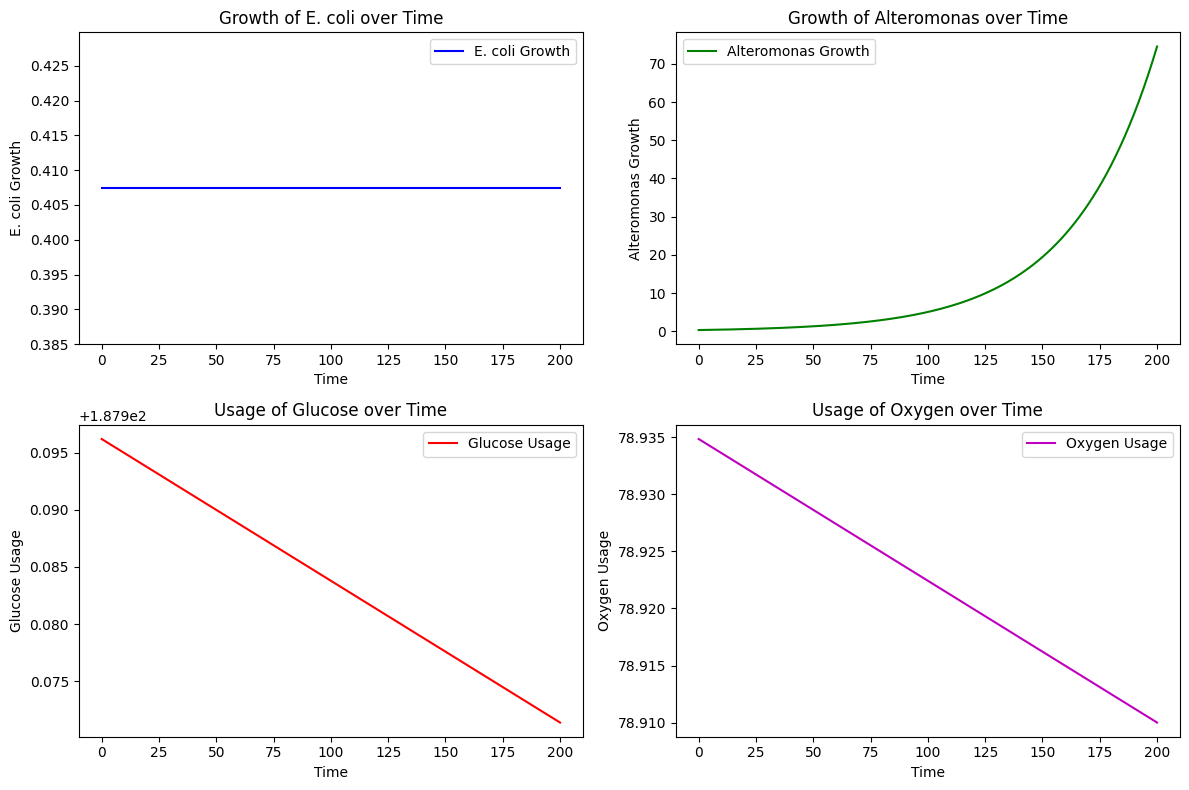

In [3]:
# Extracting the data for plotting
time_points = data["time"]
ecoli_growth = [data["species"]["ecoli"][t][0][0] for t in range(len(time_points))]
alteromonas_growth = [data["species"]["Alteromonas"][t][0][0] for t in range(len(time_points))]
glucose_usage = [data["fields"]["glucose"][t][0][0] for t in range(len(time_points))]
oxygen_usage = [data["fields"]["oxygen"][t][0][0] for t in range(len(time_points))]

# Plotting
plt.figure(figsize=(12, 8))

# Growth of E. coli over time
plt.subplot(2, 2, 1)
plt.plot(time_points, ecoli_growth, label='E. coli Growth', color='b')
plt.xlabel('Time')
plt.ylabel('E. coli Growth')
plt.title('Growth of E. coli over Time')
plt.legend()

# Growth of Alteromonas over time
plt.subplot(2, 2, 2)
plt.plot(time_points, alteromonas_growth, label='Alteromonas Growth', color='g')
plt.xlabel('Time')
plt.ylabel('Alteromonas Growth')
plt.title('Growth of Alteromonas over Time')
plt.legend()

# Usage of glucose over time
plt.subplot(2, 2, 3)
plt.plot(time_points, glucose_usage, label='Glucose Usage', color='r')
plt.xlabel('Time')
plt.ylabel('Glucose Usage')
plt.title('Usage of Glucose over Time')
plt.legend()

# Usage of oxygen over time
plt.subplot(2, 2, 4)
plt.plot(time_points, oxygen_usage, label='Oxygen Usage', color='m')
plt.xlabel('Time')
plt.ylabel('Oxygen Usage')
plt.title('Usage of Oxygen over Time')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

def plot_objective_flux_to_gif(
        data,
        total_time,
        species_names,
        filename='objective_flux_over_time.gif'
):
    available_time_points = data["time"]
    valid_time_points = list(range(total_time + 1))

    num_species = len(species_names)
    num_times = len(valid_time_points)
    images = []

    # Calculate global min and max for each species and total biomass
    global_min = [np.inf] * (num_species + 1)  # +1 for total biomass
    global_max = [-np.inf] * (num_species + 1)

    # Precompute global min/max for species and total biomass
    for time in valid_time_points:
        time_index = data["time"].index(time)
        total_biomass = np.zeros_like(data["species"][species_names[0]][time_index])

        for j, species_id in enumerate(species_names):
            current_species = data["species"][species_id][time_index]
            total_biomass += current_species
            global_min[j] = min(global_min[j], np.min(current_species))
            global_max[j] = max(global_max[j], np.max(current_species))

        # Update total biomass global min and max
        global_min[-1] = min(global_min[-1], np.min(total_biomass))
        global_max[-1] = max(global_max[-1], np.max(total_biomass))

    # Plotting each species and total biomass for each time
    for time in valid_time_points:
        time_index = data["time"].index(time)
        total_biomass = np.zeros_like(data["species"][species_names[0]][time_index])
        fig, axs = plt.subplots(1, num_species + 1, figsize=(num_species * 5, 5), squeeze=False)

        for j, species_id in enumerate(species_names):
            current_species = data["species"][species_id][time_index]
            total_biomass += current_species
            im = axs[0, j].imshow(current_species, cmap='viridis', vmin=global_min[j], vmax=global_max[j])
            axs[0, j].set_title(species_id)
            axs[0, j].set_xticks([])
            axs[0, j].set_yticks([])
            plt.colorbar(im, ax=axs[0, j], fraction=0.046, pad=0.04)

        # Plot total biomass in the last column
        im = axs[0, -1].imshow(total_biomass, cmap='viridis', vmin=global_min[-1], vmax=global_max[-1])
        axs[0, -1].set_title("Total Biomass")
        axs[0, -1].set_xticks([])
        axs[0, -1].set_yticks([])
        plt.colorbar(im, ax=axs[0, -1], fraction=0.046, pad=0.04)

        # Add the current time as text
        plt.suptitle(f'Time: {time}', fontsize=16)

        plt.tight_layout()
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=120)
        buf.seek(0)
        images.append(imageio.imread(buf))
        buf.close()
        plt.close(fig)

    # Create and save the GIF with loop=0 for infinite loop
    imageio.mimsave(filename, images, duration=0.5, loop=0)

    # Optionally display the GIF in a Jupyter notebook
    with open(filename, 'rb') as file:
        data = file.read()
        data_url = 'data:image/gif;base64,' + base64.b64encode(data).decode()
    display(HTML(f'<img src="{data_url}" alt="Objective Flux Over Time" style="max-width:100%;"/>'))

# Example usage
# Ensure to use time points that exist in your data
plot_objective_flux_to_gif(data, total_time=200, species_names=['ecoli', 'Alteromonas'])

def display_gif(filename):
    with open(filename, 'rb') as file:
        data = file.read()
        data_url = 'data:image/gif;base64,' + base64.b64encode(data).decode()
    html_str = f'<img src="{data_url}" alt="Fields Over Time" style="max-width:100%;"/><br/>'
    html_str += f'<a href="{data_url}" download="{filename}">Download GIF</a>'
    display(HTML(html_str))

# Display the GIF
# display_gif('objective_flux_over_time.gif')


/var/folders/wc/w8xfpkvd1gq1szrqlrsy0cy40000gn/T/ipykernel_27255/3397061749.py:62: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))


In [4]:
t=0

In [6]:
t=2
d=[data["species"]["ecoli"][t][-1][-1] for t in range(201)]
d

[0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.15506368495506845,
 0.1550636

In [7]:
f= [data["fields"]["glucose"][t][0][0] for t in range(201)]
f

[187.99620362900907,
 187.99607896058075,
 187.99595485057625,
 187.99583074057335,
 187.99570663057202,
 187.99558252057224,
 187.99545841057406,
 187.99533430057744,
 187.99521019058238,
 187.99508608058892,
 187.99496197059702,
 187.99483786060668,
 187.99471375061793,
 187.99458964063075,
 187.99446553064513,
 187.9943414206611,
 187.99421731067864,
 187.99409320069773,
 187.99396909071842,
 187.99384498074068,
 187.9937208707645,
 187.9935967607899,
 187.99347265081687,
 187.99334854084543,
 187.99322443087556,
 187.99310032090725,
 187.99297621094053,
 187.99285210097537,
 187.99272799101178,
 187.99260388104977,
 187.99247977108934,
 187.99235566113046,
 187.99223155117318,
 187.99210744121746,
 187.9919833312633,
 187.99185922131073,
 187.99173511135973,
 187.9916110014103,
 187.99148689146244,
 187.99136278151616,
 187.99123867157144,
 187.9911145616283,
 187.99099045168674,
 187.99086634174674,
 187.99074223180833,
 187.99061812187148,
 187.99049401193622,
 187.99036990200253